# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [4]:
# Dependencies and Setup
#!pip install -U jupyter #needed to pip install update my jupyter notebook and these libraries
#!pip install matplotlib 
#!pip install requests
#!pip install time
#!pip install scipy
#!pip install citipy

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
#output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500) #documentation here: https://numpy.org/doc/stable/reference/random/generated/numpy.random.uniform.html?highlight=random%20uniform#numpy.random.uniform
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs) #https://www.programiz.com/python-programming/methods/built-in/zip

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name #docuemntation here: https://libraries.io/pypi/citipy
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
#Some lat,lng combinations will not produce a nearby city, so it's better to have more than 500 in this step in order to make up for lack of cities near some lat,lng combos
len(cities)
#print(cities)


640

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
#inspect what the api data will look like for one city, in this example, Atlanta
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q=atlanta"
response_json = requests.get(query_url).json()
pprint(response_json)

{'base': 'stations',
 'clouds': {'all': 40},
 'cod': 200,
 'coord': {'lat': 33.749, 'lon': -84.388},
 'dt': 1612730880,
 'id': 4180439,
 'main': {'feels_like': 41.36,
          'humidity': 61,
          'pressure': 1017,
          'temp': 49.96,
          'temp_max': 51.01,
          'temp_min': 48},
 'name': 'Atlanta',
 'sys': {'country': 'US',
         'id': 4155,
         'sunrise': 1612700957,
         'sunset': 1612739652,
         'type': 1},
 'timezone': -18000,
 'visibility': 10000,
 'weather': [{'description': 'scattered clouds',
              'icon': '03d',
              'id': 802,
              'main': 'Clouds'}],
 'wind': {'deg': 330, 'speed': 10.36}}


In [7]:
#build endpoint url for our searches, using the weather_api_key defined in the first cell
url="http://api.openweathermap.org/data/2.5/weather?"
query_url = f"{url}appid={weather_api_key}&units=imperial&q="

max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []
lat = []
lng = []
city_list = [] #need this empty city list to pull in the cities found near the lat,lng provided
counter = 0 #need this counter to count the number of records processed in the for loop

for city in cities:
    response_json = requests.get(query_url + city).json() #this puts in the endpoint url for each city from our "cities" list created in the cell earlier
    
    #utilize the test print of Atlanta above to see where each of the values we need comes from
    try:
        max_temp.append(response_json['main']['temp_max'])
        humidity.append(response_json['main']['humidity'])
        cloudiness.append(response_json['clouds']['all'])
        wind_speed.append(response_json['wind']['speed'])
        country.append(response_json['sys']['country'])
        date.append(response_json['dt'])
        lat.append(response_json['coord']['lat'])
        lng.append(response_json['coord']['lon'])
        city_list.append(city)
        counter+=1
        print(f"Processing Record {counter} | {city}")
    
    except: #utilized this code found in activity 10-Stu_API_ExceptionsSolved
        print("City not found. Skipping...")
        pass #this pass allows the for loop to continue after the try/except code

Processing Record 1 | butaritari
Processing Record 2 | seoul
Processing Record 3 | yetkul
Processing Record 4 | rikitea
City not found. Skipping...
Processing Record 5 | pedernales
Processing Record 6 | mataura
Processing Record 7 | talnakh
Processing Record 8 | san cristobal
Processing Record 9 | cidreira
Processing Record 10 | hurghada
Processing Record 11 | lashio
Processing Record 12 | tasiilaq
Processing Record 13 | yellowknife
Processing Record 14 | thompson
Processing Record 15 | codrington
Processing Record 16 | glendive
Processing Record 17 | hobart
Processing Record 18 | hermanus
Processing Record 19 | kavaratti
City not found. Skipping...
Processing Record 20 | russell
Processing Record 21 | lazaro cardenas
Processing Record 22 | poum
Processing Record 23 | bambous virieux
City not found. Skipping...
Processing Record 24 | cape town
Processing Record 25 | kodiak
Processing Record 26 | kamariotissa
Processing Record 27 | chuy
Processing Record 28 | jurado
Processing Record 29

Processing Record 234 | penzance
Processing Record 235 | haysville
Processing Record 236 | vila franca do campo
Processing Record 237 | guiratinga
Processing Record 238 | havre-saint-pierre
Processing Record 239 | hay river
Processing Record 240 | damaturu
Processing Record 241 | cayenne
Processing Record 242 | tura
Processing Record 243 | cierna nad tisou
Processing Record 244 | valparaiso
Processing Record 245 | caravelas
Processing Record 246 | kosh-agach
City not found. Skipping...
Processing Record 247 | sherbakul
Processing Record 248 | bardiyah
Processing Record 249 | trairi
Processing Record 250 | aykhal
Processing Record 251 | cagdianao
Processing Record 252 | pangnirtung
Processing Record 253 | svetlogorsk
Processing Record 254 | borgarnes
Processing Record 255 | pitimbu
Processing Record 256 | imbituba
Processing Record 257 | jardim
Processing Record 258 | zhanaozen
Processing Record 259 | nome
Processing Record 260 | santiago del estero
Processing Record 261 | vao
Processin

Processing Record 463 | burnie
Processing Record 464 | huangcun
Processing Record 465 | pielesti
Processing Record 466 | nyurba
Processing Record 467 | bayeux
Processing Record 468 | sydney
Processing Record 469 | presidente dutra
Processing Record 470 | broome
Processing Record 471 | kpalime
Processing Record 472 | aswan
Processing Record 473 | bama
Processing Record 474 | cassino
Processing Record 475 | palana
Processing Record 476 | shambu
Processing Record 477 | palafrugell
Processing Record 478 | petukhovo
Processing Record 479 | alice springs
Processing Record 480 | cockburn town
Processing Record 481 | galle
Processing Record 482 | shangqiu
Processing Record 483 | dailly
Processing Record 484 | nemencine
Processing Record 485 | san andres
Processing Record 486 | gashua
Processing Record 487 | batagay
Processing Record 488 | kaeo
Processing Record 489 | tautira
Processing Record 490 | jashpurnagar
Processing Record 491 | neuquen
Processing Record 492 | narovchat
Processing Record

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [8]:
#create a data frame from the lists created through iteration throug the api request in earlier cell
city_data=pd.DataFrame({
    'City': city_list,
    'Lat': lat,
    'Lng': lng,
    'Max Temp': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': date
})

#import dependencies to convert dataframe to csv
import os
import csv
# Export Dataframe into a .csv
city_data.to_csv("output_data/cities.csv")

city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.0707,172.7902,81.28,80,96,19.91,KI,1612730964
1,seoul,37.5683,126.9778,24.80,54,0,10.36,KR,1612730803
2,yetkul,54.8221,61.5880,-0.40,65,73,11.18,RU,1612730964
3,rikitea,-23.1203,-134.9692,77.65,72,96,11.97,PF,1612730964
4,pedernales,18.0384,-71.7440,84.69,52,33,3.29,DO,1612730965


In [9]:
#print the stats for the dataframe
city_data.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,589.000000,589.000000,589.000000,589.000000,589.000000,589.000000,5.890000e+02
mean,19.779362,20.121771,49.011256,71.937182,52.867572,8.553616,1.612731e+09
std,33.614292,90.049005,33.383345,20.029684,40.780641,5.891615,7.912773e+01
min,-54.800000,-179.166700,-37.320000,9.000000,0.000000,0.070000,1.612730e+09
25%,-9.012200,-54.916700,24.800000,62.000000,4.000000,4.340000,1.612731e+09
50%,23.633300,23.950000,62.010000,77.000000,62.000000,7.000000,1.612731e+09
75%,49.633300,101.766700,76.820000,86.000000,96.000000,11.500000,1.612731e+09
max,78.218600,179.316700,96.010000,100.000000,100.000000,36.820000,1.612731e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [10]:
#according to the max value of humidity above (100), there are no cities where the humidity is >100%, so we do not need to drop any of our cities.

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

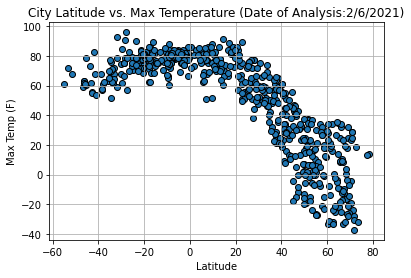

In [11]:
plt.scatter(city_data["Lat"],city_data["Max Temp"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.title('City Latitude vs. Max Temperature (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("images/scatter1_latvstemp.png")
plt.show()

## Latitude vs. Humidity Plot

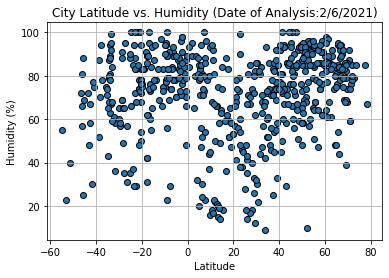

In [12]:
plt.scatter(city_data["Lat"],city_data["Humidity"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title('City Latitude vs. Humidity (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("images/scatter2_latvshumidity.png")
plt.show()

## Latitude vs. Cloudiness Plot

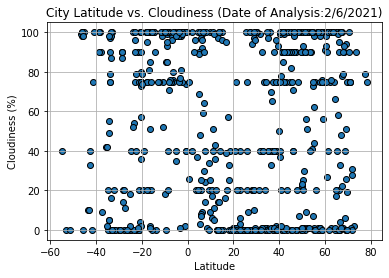

In [13]:
plt.scatter(city_data["Lat"],city_data["Cloudiness"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title('City Latitude vs. Cloudiness (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("images/scatter3_latvscloud.png")
plt.show()

## Latitude vs. Wind Speed Plot

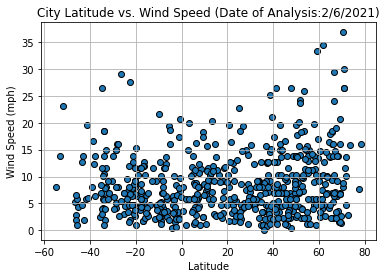

In [14]:
plt.scatter(city_data["Lat"],city_data["Wind Speed"],edgecolors="black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title('City Latitude vs. Wind Speed (Date of Analysis:2/6/2021)')
plt.grid()
plt.savefig("images/scatter4_latvswind.png")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.86.


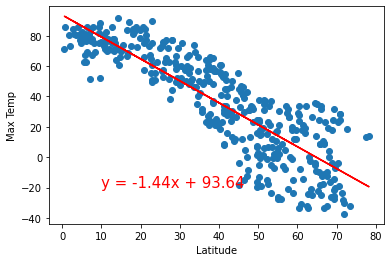

In [15]:
import scipy.stats as st #import correlation module

northhem_data = city_data.loc[city_data['Lat'] >= 0]#create northern hemisphere data, which contains latitudes greater than or equal to zero

correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Max Temp"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Max Temp"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(10,-20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("images/regression1_north_latvstemp.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is 0.55.


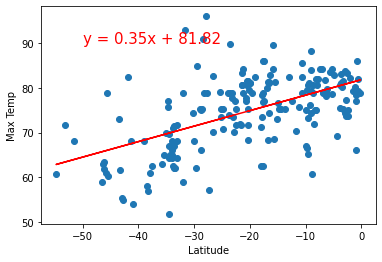

In [16]:
southhem_data = city_data.loc[city_data['Lat'] < 0]#create southern hemisphere data, which contains latitudes less than zero

correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Max Temp"])
print(f"The r-value is {round(correlation[0],2)}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Max Temp"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Max Temp"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp")
plt.savefig("images/regression2_south_latvstemp.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.356498985741203.


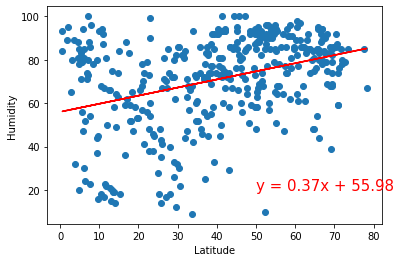

In [17]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Humidity"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Humidity"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("images/regression3_north_latvshumidity.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is 0.3060708720152116.


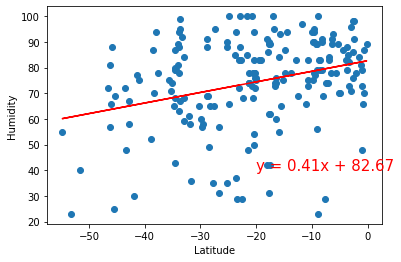

In [18]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Humidity"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Humidity"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Humidity"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-20,40),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.savefig("images/regression4_south_latvshumidity.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.16353427443300522.


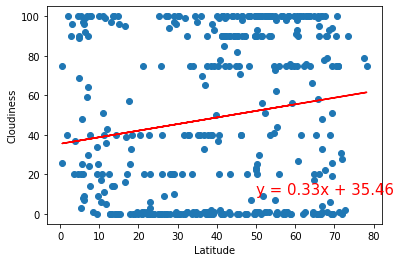

In [19]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Cloudiness"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Cloudiness"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("images/regression5_north_latvscloud.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is 0.3242307275690277.


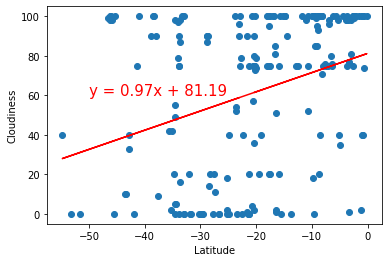

In [20]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Cloudiness"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Cloudiness"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Cloudiness"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-50,60),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.savefig("images/regression6_south_latvscloud.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is 0.1910706789483582.


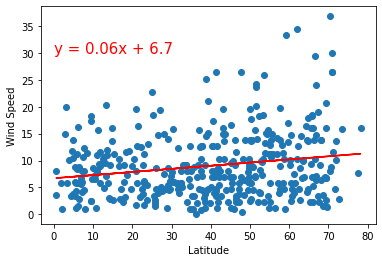

In [21]:
correlation = st.pearsonr(northhem_data["Lat"],northhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(northhem_data["Lat"],northhem_data["Wind Speed"])
regress_values = northhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(northhem_data["Lat"],northhem_data["Wind Speed"])
plt.plot(northhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(0,30),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("images/regression7_north_latvswind.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is -0.16878600024273696.


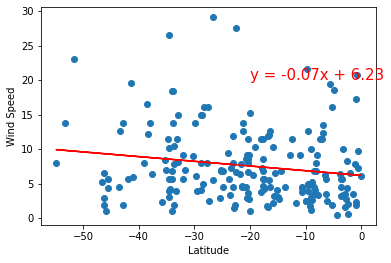

In [22]:
correlation = st.pearsonr(southhem_data["Lat"],southhem_data["Wind Speed"])
print(f"The r-value is {correlation[0]}.")

(slope, intercept, rvalue, pvalue, stderr) = linregress(southhem_data["Lat"],southhem_data["Wind Speed"])
regress_values = southhem_data["Lat"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(southhem_data["Lat"],southhem_data["Wind Speed"])
plt.plot(southhem_data["Lat"],regress_values,"r-")
plt.annotate(line_eq,(-20,20),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.savefig("images/regression8_south_latvswind.png")
plt.show()